In [2]:
# *** Red wine analysis ***

In [3]:
# Dataset and info 

import pandas as pd

red_wine = pd.read_csv("../winequality-red.csv", sep=';')


red_wine.head()

red_wine.shape

red_wine.info()

red_wine.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


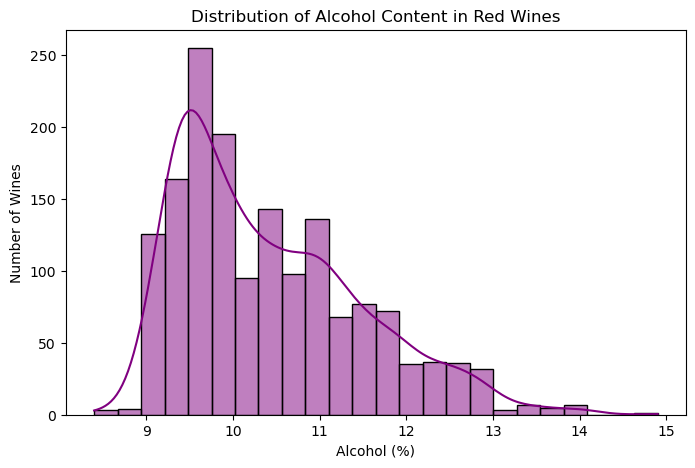

RED WINE STATISTICS:

Total number of wines: 1599
Average alcohol content: 10.42%
Alcohol range: 8.4% - 14.9%


In [4]:
#  visualisation - alcohol distribution

import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 5))
sns.histplot(data=red_wine, x='alcohol', kde=True, color='purple')

plt.title('Distribution of Alcohol Content in Red Wines')
plt.xlabel('Alcohol (%)')
plt.ylabel('Number of Wines')

plt.show()

print("RED WINE STATISTICS:\n")

print(f"Total number of wines: {len(red_wine)}")
print(f"Average alcohol content: {red_wine['alcohol'].mean():.2f}%")
print(f"Alcohol range: {red_wine['alcohol'].min():.1f}% - {red_wine['alcohol'].max():.1f}%")



C:\Users\wikto\AppData\Local\Temp\ipykernel_22160\4292378043.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='alcohol', data=red_wine, order=all_quality_scores, palette='RdPu')


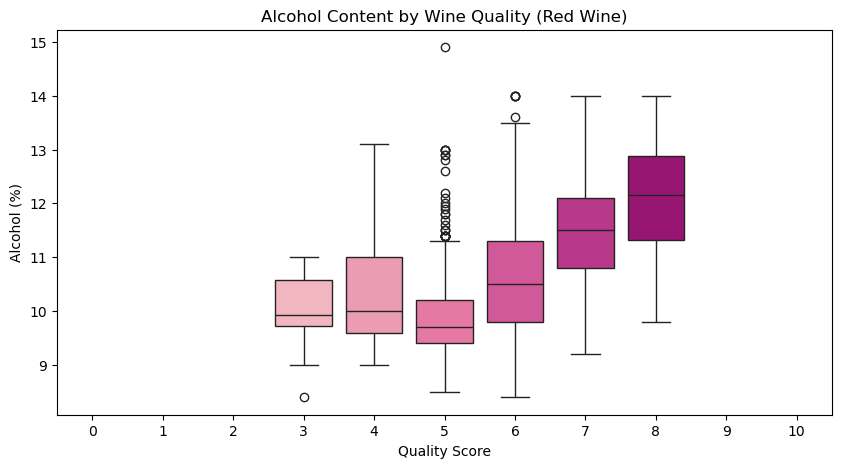

In [5]:
# alcohol content by wine quality in red wine

import numpy as np

#  range of possible quality scores 
all_quality_scores = np.arange(0, 11)


# vizualization
plt.figure(figsize=(10, 5))
sns.boxplot(x='quality', y='alcohol', data=red_wine, order=all_quality_scores, palette='RdPu')

plt.title('Alcohol Content by Wine Quality (Red Wine)')
plt.xlabel('Quality Score')
plt.ylabel('Alcohol (%)')

plt.show()



In [6]:
# Correlation between alcohol and quality
correlation = red_wine[['alcohol', 'quality']].corr()
correlation




,alcohol,quality
alcohol,1.000000,0.476166
quality,0.476166,1.000000


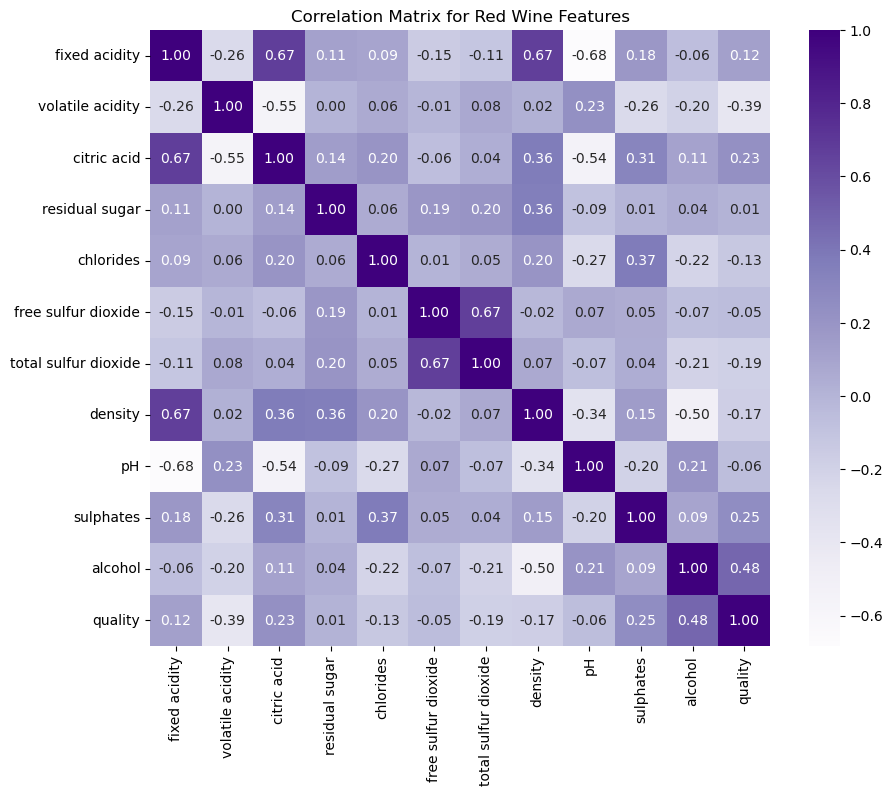

In [7]:
# correlation matrix for all features

correlation_matrix = red_wine.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Purples', fmt=".2f")

plt.title("Correlation Matrix for Red Wine Features")
plt.show()


Pearson correlation: 0.4762
P-value: 0.000000


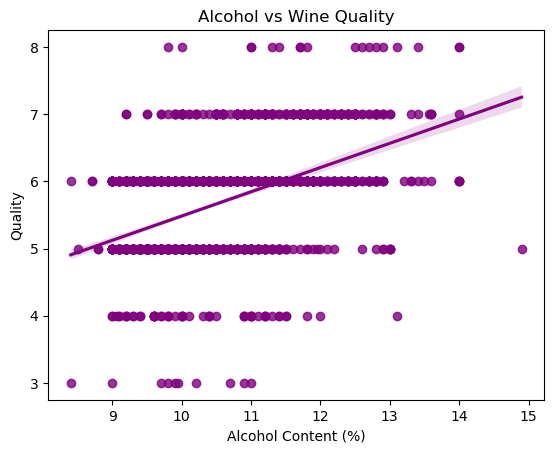

In [8]:
# *** Pearson Correlation *** 

from scipy.stats import pearsonr

r, p_value = pearsonr(red_wine['alcohol'], red_wine['quality'])

print(f"Pearson correlation: {r:.4f}")
print(f"P-value: {p_value:.6f}")

# Visualization 

sns.regplot(
    x='alcohol',
    y='quality',
    data=red_wine,
    color='purple', 
    #scatter_kws={"alpha": 0.5} 
)
plt.title("Alcohol vs Wine Quality")
plt.xlabel("Alcohol Content (%)")
plt.ylabel("Quality")
plt.show()



In [9]:
# *** Decision Tree ****

In [10]:
#  features (X), target (y)
X = red_wine.drop("quality", axis=1)  
y = red_wine["quality"]               


In [11]:
from sklearn.model_selection import train_test_split

# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


tree_model = DecisionTreeClassifier(random_state=42) # creating the decision tree model


tree_model.fit(X_train, y_train) #training


y_pred = tree_model.predict(X_test) # predicting 

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.2f}")


Decision Tree Accuracy: 0.56


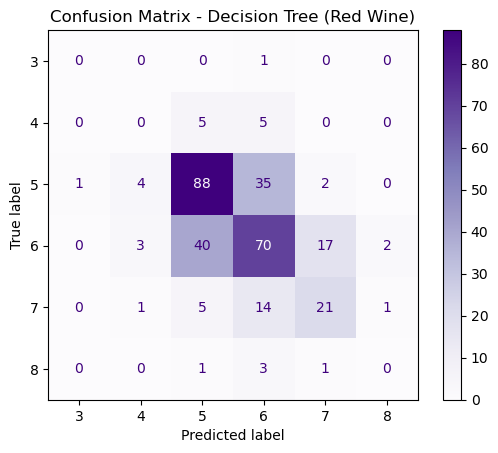

In [13]:
# visualization - confusion matrix for decision tree

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=tree_model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_model.classes_)
disp.plot(cmap='Purples')
plt.title("Confusion Matrix - Decision Tree (Red Wine)")
disp.ax_.grid(False)
plt.show()


In [14]:
# **** making sure all predicted labels are included ... ****
# ** this is done for all features **

#  features (X), target (y)
X = red_wine.drop("quality", axis=1)  
y = red_wine["quality"]               



All quality scores in dataset: [3, 4, 5, 6, 7, 8]
Decision Tree Accuracy: 0.56


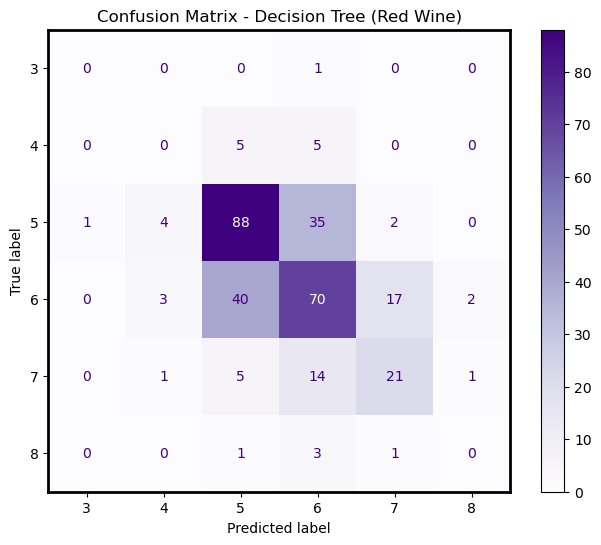

Random baseline accuracy: 0.167 (16.7%)
Model improvement over random: 39.3 percentage points


In [15]:
# checking all quality scores in this dataset
print("All quality scores in dataset:", sorted(y.unique()))
all_quality_labels = sorted(y.unique())

from sklearn.model_selection import train_test_split

# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree_model = DecisionTreeClassifier(random_state=42) # model

tree_model.fit(X_train, y_train) # training using training set

y_pred = tree_model.predict(X_test) # prediction

# accuracy !
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.2f}")

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# vizualization - confusion matrix with all quality labels 
cm = confusion_matrix(y_test, y_pred, labels=all_quality_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=all_quality_labels)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap='Purples', ax=ax)


for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(2)

ax.grid(False)


plt.title("Confusion Matrix - Decision Tree (Red Wine)")
plt.show()


# random baseline vs model improvement 
num_classes = len(all_quality_labels)
random_baseline = 1 / num_classes
print(f"Random baseline accuracy: {random_baseline:.3f} ({random_baseline*100:.1f}%)")
print(f"Model improvement over random: {(accuracy - random_baseline)*100:.1f} percentage points")

In [16]:
# *** Feature Importance ***

In [17]:
import pandas as pd

# feature importance values
importances = tree_model.feature_importances_

# table and display
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


feature_importance_df



,Feature,Importance
10,alcohol,0.178035
9,sulphates,0.109806
7,density,0.103983
6,total sulfur dioxide,0.098286
1,volatile acidity,0.088539
4,chlorides,0.079945
2,citric acid,0.079002
8,pH,0.071373
3,residual sugar,0.066926
0,fixed acidity,0.065299


C:\Users\wikto\AppData\Local\Temp\ipykernel_22160\550523198.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='autumn')


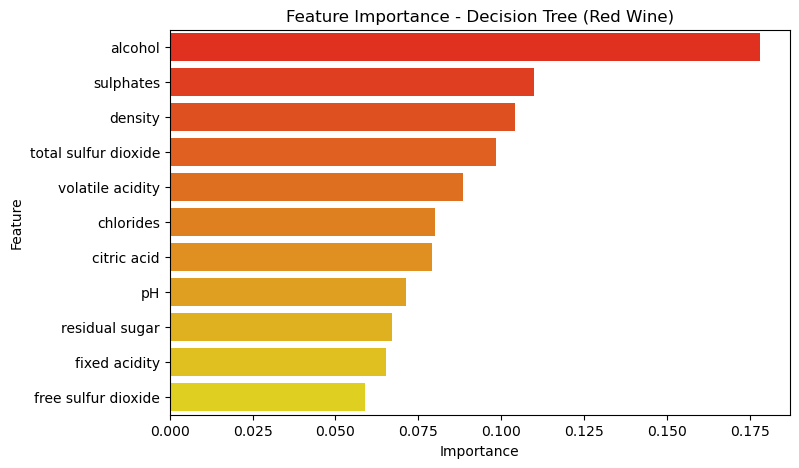

In [18]:
# vizualization 

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='autumn')
plt.title('Feature Importance - Decision Tree (Red Wine)')
plt.show()


In [19]:
# *** Decision Tree with 4 most important features ***

In [20]:
# top 4 most important features
top_features = feature_importance_df['Feature'].head(4).tolist()
print("Top features:", top_features)

Top features: ['alcohol', 'sulphates', 'density', 'total sulfur dioxide']


In [21]:
# ***Updated Decision Tree*** 
# training using only top 4 features 

Accuracy using top features only: 0.60


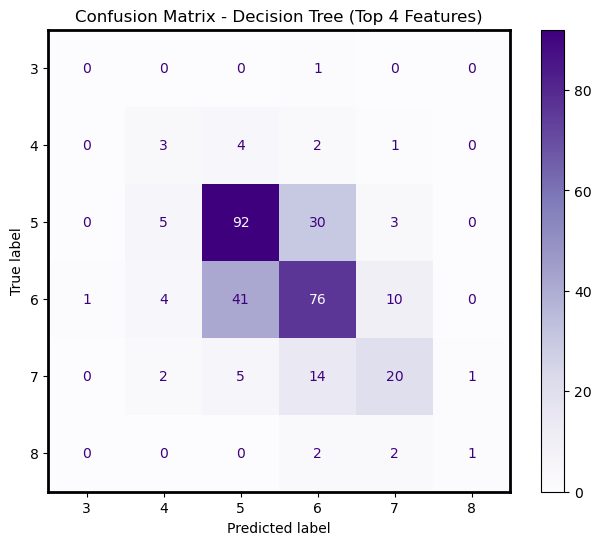

Random baseline accuracy: 0.167 (16.7%)
Model improvement over random: 43.3 percentage points


In [22]:

X_top = red_wine[top_features] 

# splitting data
from sklearn.model_selection import train_test_split

X_train_top, X_test_top, y_train, y_test = train_test_split(
    X_top, y, test_size=0.2, random_state=42
)

# retraining decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


tree_model_top = DecisionTreeClassifier(random_state=42) # new model

tree_model_top.fit(X_train_top, y_train) # training

y_pred_top = tree_model_top.predict(X_test_top) # prediction

# accuracy !
accuracy_top = accuracy_score(y_test, y_pred_top)
print(f"Accuracy using top features only: {accuracy_top:.2f}")

#  vizualisation - confusion matrix with all quality labels
all_quality_labels = sorted(y.unique())  
cm_top = confusion_matrix(y_test, y_pred_top, labels=all_quality_labels)

disp_top = ConfusionMatrixDisplay(confusion_matrix=cm_top, display_labels=all_quality_labels)
fig, ax = plt.subplots(figsize=(8, 6))
disp_top.plot(cmap='Purples', ax=ax)


for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(2)

ax.grid(False)

plt.title("Confusion Matrix - Decision Tree (Top 4 Features)")
plt.show()

# calculating random baseline for comparison with current accuarcy
num_classes = len(all_quality_labels)
random_baseline = 1 / num_classes
print(f"Random baseline accuracy: {random_baseline:.3f} ({random_baseline*100:.1f}%)")
print(f"Model improvement over random: {(accuracy_top - random_baseline)*100:.1f} percentage points")

In [23]:
# *** # Random Forest - using top 4 features 

Random Forest Accuracy (Top 4 Features): 0.68


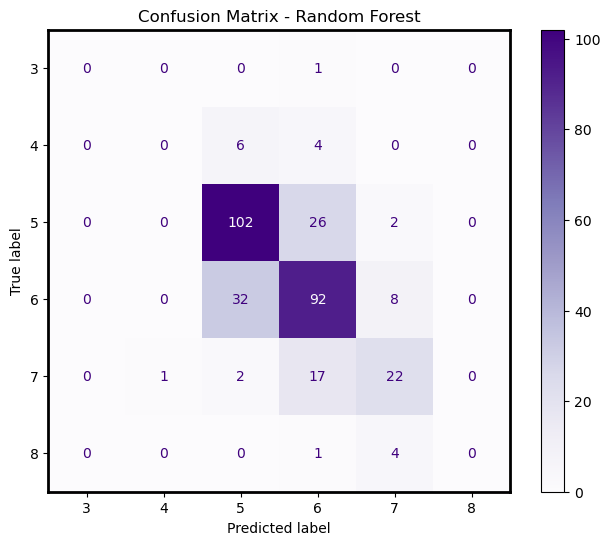

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=140, random_state=42)

# training  on the same training data - 4 top fetaures
rf_model.fit(X_train_top, y_train)

# predicition
y_pred_rf = rf_model.predict(X_test_top)

# accuracy !
from sklearn.metrics import accuracy_score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy (Top 4 Features): {accuracy_rf:.2f}")

# visualization
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

all_quality_labels = sorted(y.unique())  
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=all_quality_labels)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)

fig, ax = plt.subplots(figsize=(8, 6))
disp_rf.plot(cmap='Purples', ax=ax)

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(2)

ax.grid(False)

plt.title("Confusion Matrix - Random Forest")
plt.show()



In [25]:
# *** Random Forest accuracy using all features ***

In [26]:
from sklearn.model_selection import train_test_split

X_train_full, X_test_full, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.ensemble import RandomForestClassifier

rf_model_full = RandomForestClassifier(n_estimators=140, random_state=42)
rf_model_full.fit(X_train_full, y_train)

from sklearn.metrics import accuracy_score

y_pred_full = rf_model_full.predict(X_test_full)
accuracy_full = accuracy_score(y_test, y_pred_full)
print(f"Random Forest Accuracy (All Features): {accuracy_full:.2f}")


Random Forest Accuracy (All Features): 0.66


In [27]:
# conclusion - Random Forest accuracy when used all fetaures worse than when used top few features

In [31]:
# Random Forest Top Features without alcohol 

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#  top features without 'alcohol'

top_features_no_alcohol = ['sulphates', 'density', 'total sulfur dioxide']  # without alcohol now but when adjusted gives different values


#  new feature set
X_no_alcohol = red_wine[top_features_no_alcohol]
y = red_wine['quality']

# splitting the data
X_train_na, X_test_na, y_train, y_test = train_test_split(
    X_no_alcohol, y, test_size=0.2, random_state=42
)

# training random forest
rf_no_alcohol = RandomForestClassifier(
    n_estimators=140,
    max_depth=None,
    min_samples_split=2,
    max_features='sqrt',
    random_state=42
)
rf_no_alcohol.fit(X_train_na, y_train)

# accuarcy 
y_pred_na = rf_no_alcohol.predict(X_test_na)
accuracy_na = accuracy_score(y_test, y_pred_na)

print(f"Accuracy WITHOUT alcohol: {accuracy_na:.2f}")


Accuracy WITHOUT alcohol: 0.64


In [33]:
# *** Random Forest ablation testing *** (top features importance in accuracy)

In [34]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


#top features 
top_features = ['alcohol', 'sulphates', 'density', 'total sulfur dioxide']
print("Top features:", top_features)

test_scenarios = {

   # individual feature tests
   'Only Alcohol': ['alcohol'],
   'Only Sulphates': ['sulphates'],
   'Only Density': ['density'],
   'Only Total Sulfur Dioxide': ['total sulfur dioxide'],

   # feature removal tests
   'Without Alcohol': [f for f in top_features if f != 'alcohol'],
   'Without Sulphates': [f for f in top_features if f != 'sulphates'],
   'Without Density': [f for f in top_features if f != 'density'],
   'Without Total Sulfur Dioxide': [f for f in top_features if f != 'total sulfur dioxide'],

   # feature baseline
   'Top Features': top_features
}

# function to run ablation test
def run_ablation_test(feature_list, scenario_name, show_confusion_matrix=False):
   """
   Run ablation test with specified features
   """
  
   X_test = red_wine[feature_list]  
   y_test = red_wine['quality']    
   X_train, X_val, y_train, y_val = train_test_split(
       X_test, y_test, test_size=0.2, random_state=42
   )
   
   rf_model = RandomForestClassifier(n_estimators=140, random_state=42)
   rf_model.fit(X_train, y_train)
 
   y_pred = rf_model.predict(X_val)
   accuracy = accuracy_score(y_val, y_pred)

   
   print(f"{scenario_name}: {accuracy:.3f} ({accuracy*100:.1f}%)")
   
   return accuracy

print("ABLATION TEST RESULTS\n")
results = {}
for scenario_name, features in test_scenarios.items():
   accuracy = run_ablation_test(features, scenario_name)
   results[scenario_name] = accuracy

Top features: ['alcohol', 'sulphates', 'density', 'total sulfur dioxide']
ABLATION TEST RESULTS

Only Alcohol: 0.516 (51.6%)
Only Sulphates: 0.475 (47.5%)
Only Density: 0.447 (44.7%)
Only Total Sulfur Dioxide: 0.472 (47.2%)
Without Alcohol: 0.641 (64.1%)
Without Sulphates: 0.606 (60.6%)
Without Density: 0.641 (64.1%)
Without Total Sulfur Dioxide: 0.609 (60.9%)
Top Features: 0.675 (67.5%)


In [35]:
# SMOTE analysis for imbalanced dataset 


=== ORIGINAL CLASS DISTRIBUTION ===
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

Training set size: 1279
Training distribution: Counter({5: 545, 6: 510, 7: 159, 4: 42, 8: 15, 3: 8})

=== APPLYING SMOTE ===
After SMOTE size: 3270
SMOTE distribution: Counter({6: 545, 5: 545, 7: 545, 3: 545, 4: 545, 8: 545})

=== TRAINING MODELS ===
Accuracy (Original): 0.6781
Accuracy (SMOTE): 0.6312


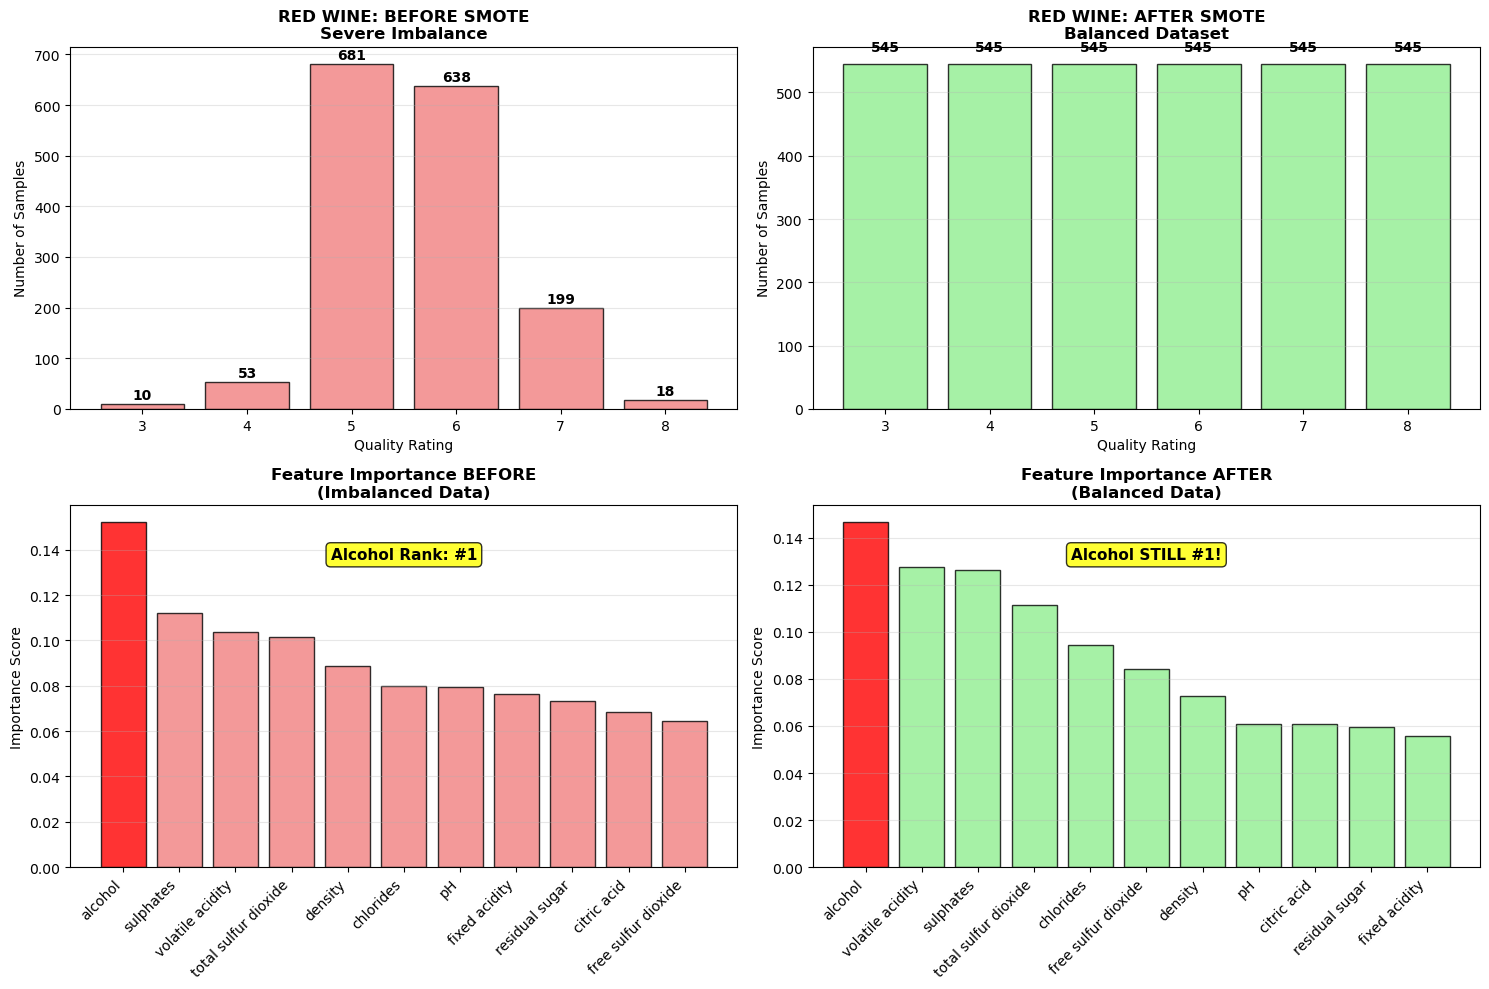

In [ ]:
# Red WINE SMOTE ANALYSIS - Complete Training Code with Visualization (FIXED RANKING)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE



# Step 1: Check class distribution
print("\n=== ORIGINAL CLASS DISTRIBUTION ===")
quality_counts = red_wine['quality'].value_counts().sort_index()
print(quality_counts)

# Step 2: Prepare data
X = red_wine.drop('quality', axis=1)
y = red_wine['quality']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set size: {len(X_train)}")
print("Training distribution:", Counter(y_train))

# Step 3: Apply SMOTE
print("\n=== APPLYING SMOTE ===")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"After SMOTE size: {len(X_train_smote)}")
print("SMOTE distribution:", Counter(y_train_smote))

# Step 4: Train models
print("\n=== TRAINING MODELS ===")

# Train without SMOTE (original imbalanced data)
rf_original = RandomForestClassifier(n_estimators=100, random_state=42)
rf_original.fit(X_train, y_train)
y_pred_original = rf_original.predict(X_test)

# Train with SMOTE (balanced data)
rf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = rf_smote.predict(X_test)

# Step 5: Compare results
print(f"Accuracy (Original): {accuracy_score(y_test, y_pred_original):.4f}")
print(f"Accuracy (SMOTE): {accuracy_score(y_test, y_pred_smote):.4f}")

# Step 6: Create the 4-panel visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Before SMOTE (top left)
quality_counts = red_wine['quality'].value_counts().sort_index()
axes[0,0].bar(quality_counts.index, quality_counts.values, color='lightcoral', alpha=0.8, edgecolor='black')
axes[0,0].set_title('RED WINE: BEFORE SMOTE\nSevere Imbalance', fontweight='bold')
axes[0,0].set_ylabel('Number of Samples')
axes[0,0].set_xlabel('Quality Rating')
axes[0,0].grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(quality_counts.values):
    axes[0,0].text(quality_counts.index[i], v + 10, str(v), ha='center', fontweight='bold')

# 2. After SMOTE (top right)
smote_counts = pd.Series(Counter(y_train_smote)).sort_index()
axes[0,1].bar(smote_counts.index, smote_counts.values, color='lightgreen', alpha=0.8, edgecolor='black')
axes[0,1].set_title('RED WINE: AFTER SMOTE\nBalanced Dataset', fontweight='bold')
axes[0,1].set_ylabel('Number of Samples')
axes[0,1].set_xlabel('Quality Rating')
axes[0,1].grid(axis='y', alpha=0.3)

# Add value labels
for quality, count in smote_counts.items():
    axes[0,1].text(quality, count + 20, str(count), ha='center', fontweight='bold')

# 3. Feature Importance BEFORE SMOTE (bottom left)
feature_imp_original = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_original.feature_importances_
}).sort_values('importance', ascending=False)

colors_orig = ['red' if x == 'alcohol' else 'lightcoral' for x in feature_imp_original['feature']]
axes[1,0].bar(range(len(feature_imp_original)), feature_imp_original['importance'],
              color=colors_orig, alpha=0.8, edgecolor='black')
axes[1,0].set_title('Feature Importance BEFORE\n(Imbalanced Data)', fontweight='bold')
axes[1,0].set_ylabel('Importance Score')
axes[1,0].set_xticks(range(len(feature_imp_original)))
axes[1,0].set_xticklabels(feature_imp_original['feature'], rotation=45, ha='right')
axes[1,0].grid(axis='y', alpha=0.3)

# 4. Feature Importance AFTER SMOTE (bottom right)
feature_imp_smote = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_smote.feature_importances_
}).sort_values('importance', ascending=False)

colors_smote = ['red' if x == 'alcohol' else 'lightgreen' for x in feature_imp_smote['feature']]
axes[1,1].bar(range(len(feature_imp_smote)), feature_imp_smote['importance'],
              color=colors_smote, alpha=0.8, edgecolor='black')
axes[1,1].set_title('Feature Importance AFTER\n(Balanced Data)', fontweight='bold')
axes[1,1].set_ylabel('Importance Score')
axes[1,1].set_xticks(range(len(feature_imp_smote)))
axes[1,1].set_xticklabels(feature_imp_smote['feature'], rotation=45, ha='right')
axes[1,1].grid(axis='y', alpha=0.3)

# Add annotations showing alcohol stays #1
axes[1,0].text(0.5, 0.85, 'Alcohol Rank: #1', transform=axes[1,0].transAxes,
               fontsize=11, ha='center', fontweight='bold',
               bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.8))
axes[1,1].text(0.5, 0.85, 'Alcohol STILL #1!', transform=axes[1,1].transAxes,
               fontsize=11, ha='center', fontweight='bold',
               bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.8))

plt.tight_layout()
plt.show()